#**1. Import các thư viện cần thiết**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#**2. Kết nối với Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**3. Đọc dữ liệu**

## 3.1. Load một ảnh

In [ ]:
IMG_SIZE = 227

img = cv2.imread("/content/drive/MyDrive/DS_Storage/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg") 
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 

In [ ]:
img

array([[[18, 18, 18],
        [21, 21, 21],
        [27, 27, 27],
        ...,
        [ 8,  8,  8],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[19, 19, 19],
        [24, 24, 24],
        [27, 27, 27],
        ...,
        [ 9,  9,  9],
        [ 5,  5,  5],
        [ 1,  1,  1]],

       [[21, 21, 21],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [10, 10, 10],
        [ 6,  6,  6],
        [ 1,  1,  1]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]]], dtype=uint8)

##3.2. Trực quan hoá ảnh

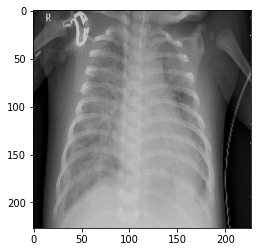

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

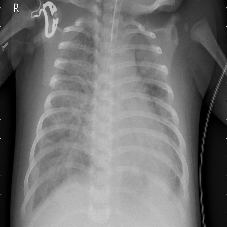

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img.shape

(227, 227, 3)

##3.3. Load toàn bộ dữ liệu

In [ ]:
import glob
import numpy as np
import cv2

IMG_SIZE = 227

def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['NORMAL', 'PNEUMONIA']
    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)
            img = cv2.imread(f) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X,[img]])
            y = np.append(y, c)

    return (X,y)

In [ ]:
X_train, y_train = load_dataset("/content/drive/MyDrive/DS_Storage/chest_xray/train/")

In [ ]:
X_dev, y_dev = load_dataset("/content/drive/MyDrive/DS_Storage/chest_xray/val/")

In [ ]:
X_test, y_test = load_dataset("/content/drive/MyDrive/DS_Storage/chest_xray/test/")

#**4. Mã hoá dữ liệu**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [ ]:
IMG_SIZE = 227

X1 = X_train.reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE*3)
X2 = X_dev.reshape(X_dev.shape[0], IMG_SIZE*IMG_SIZE*3)
X3 = X_test.reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE*3)

In [ ]:
y1 = le.transform(y_train)
y2 = le.transform(y_dev)
y3 = le.transform(y_test)

In [ ]:
X_train[:1]

array([[[[53, 53, 53],
         [56, 56, 56],
         [63, 63, 63],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[47, 47, 47],
         [59, 59, 59],
         [63, 63, 63],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[45, 45, 45],
         [53, 53, 53],
         [58, 58, 58],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]]], dtype=uint8)

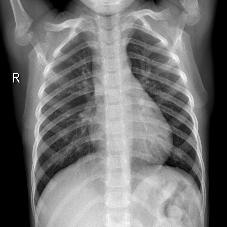

In [ ]:
cv2_imshow(X_train[0])

In [ ]:
X1

array([[ 53,  53,  53, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 25,  25,  25, ...,   0,   0,   0],
       ...,
       [203, 203, 203, ...,  23,  23,  23],
       [ 83,  83,  83, ...,  21,  21,  21],
       [ 79,  79,  79, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
y_train[:-10]

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], dtype='<U32')

In [ ]:
print(le.classes_)
print('Top 5 classes indices: ', y1[:-10])

['NORMAL' 'PNEUMONIA']
Top 5 classes indices:  [0 0 0 ... 1 1 1]


#**5. Huấn luyện mô hình**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(X1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#**6. Dự đoán kết quả**

In [ ]:
y_pred = model.predict(X3)

In [ ]:
y3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: {}".format(accuracy_score(y3, y_pred)))
print("Precision: ",str(precision_score(y3, y_pred)))
print("Recall: " + str(recall_score(y3, y_pred)))
print("F1-micro: " + str(f1_score(y3, y_pred, average='micro')))
print("F1-macro: " + str(f1_score(y3, y_pred, average='macro')))

cf = confusion_matrix(y3, y_pred)
cr = classification_report(y3, y_pred)

Accuracy: 0.7371794871794872
Precision:  0.7084870848708487
Recall: 0.9846153846153847
F1-micro: 0.7371794871794872
F1-macro: 0.6525234964958984


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.32      0.48       234
           1       0.71      0.98      0.82       390

    accuracy                           0.74       624
   macro avg       0.82      0.65      0.65       624
weighted avg       0.79      0.74      0.70       624



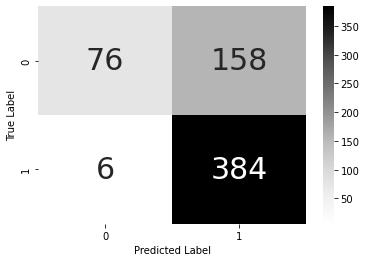

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(cf, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#**7. Kiểm tra**

In [ ]:
y_pred[0]

1

In [ ]:
error_indexes = []
for i in range(0, len(y3)):
    if y3[i] != y_pred[i]:
        error_indexes.append(i)

In [ ]:
error_indexes

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 32,
 35,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 47,
 51,
 60,
 61,
 63,
 64,
 65,
 66,
 68,
 70,
 72,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 100,
 101,
 103,
 105,
 106,
 110,
 111,
 112,
 115,
 116,
 117,
 118,
 120,
 121,
 124,
 125,
 127,
 131,
 132,
 133,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 161,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 207,
 209,
 210,
 211,
 213,
 214,
 216,
 217,
 219,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 230,
 232,
 233,
 257,
 267,
 282,
 359,
 422,
 493]

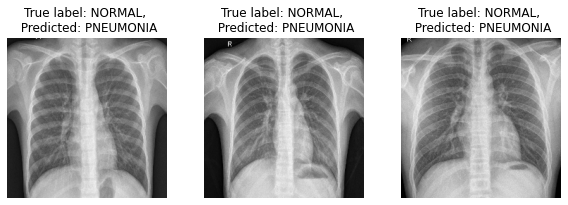

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    # plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
    plt.imshow(X_test[i])
    plt.title("True label: {}, \n Predicted: {}".format(le.inverse_transform([y3[i]])[0], le.inverse_transform([y_pred[i]])[0]))
    plt.axis("off")